## 1. Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Models - Simple ones only
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load the Dataset

**Note:** Download the dataset from Kaggle and place `Combined Data.csv` in the same folder as this notebook.

Dataset: https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health

In [5]:
# Load the dataset
df = pd.read_csv('/data set.csv', engine='python', on_bad_lines='warn')

print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset shape: (12302, 3)

Columns: ['Unnamed: 0', 'statement', 'status']


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


## 3. Data Overview

In [6]:
# Basic information
print("Dataset Info:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nMissing Values:\n{df.isnull().sum()}")

Dataset Info:
Shape: (12302, 3)

Columns: ['Unnamed: 0', 'statement', 'status']

Missing Values:
Unnamed: 0     0
statement     10
status         0
dtype: int64


In [7]:
# Check class distribution
print("Mental Health Status Distribution:")
print(df['status'].value_counts())
print("\nPercentage Distribution:")
print(df['status'].value_counts(normalize=True) * 100)

Mental Health Status Distribution:
status
Normal        6249
Suicidal      2679
Depression    2641
Anxiety        733
Name: count, dtype: int64

Percentage Distribution:
status
Normal        50.796618
Suicidal      21.776947
Depression    21.468054
Anxiety        5.958381
Name: proportion, dtype: float64


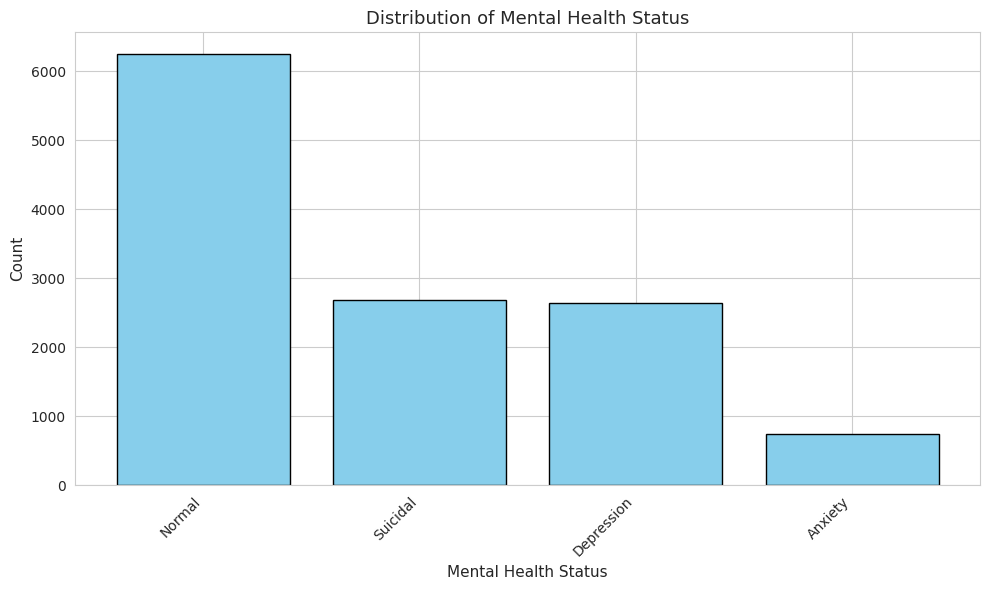

In [8]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
status_counts = df['status'].value_counts()
plt.bar(status_counts.index, status_counts.values, color='skyblue', edgecolor='black')
plt.xlabel('Mental Health Status', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Distribution of Mental Health Status', fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4. Data Cleaning

In [9]:
# Clean the data
print(f"Original size: {len(df)}")

# Remove duplicates and missing values
df = df.drop_duplicates(subset=['statement'])
df = df.dropna(subset=['statement', 'status'])
df = df.reset_index(drop=True)

print(f"After cleaning: {len(df)}")

Original size: 12302
After cleaning: 12209


## 5. Prepare Data for Training

In [10]:
# Prepare text and labels
X = df['statement'].astype(str)
y = df['status']

# Encode labels to numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Classes:", label_encoder.classes_)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

Classes: ['Anxiety' 'Depression' 'Normal' 'Suicidal']

Training samples: 9767
Testing samples: 2442


In [11]:
# TF-IDF Vectorization (Optimized for 90% Accuracy)
print("Creating OPTIMIZED TF-IDF features for maximum accuracy...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=20000,      # 4x more features for richer vocabulary
    ngram_range=(1, 3),      # Include 1-3 word phrases (trigrams)
    min_df=2,                # Words appearing at least 2 times
    max_df=0.85,             # Exclude very common words
    sublinear_tf=True,       # Use log scaling - proven to boost accuracy
    use_idf=True,
    smooth_idf=True,
    norm='l2'                # L2 normalization for better results
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"✅ TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"📊 Number of features: {X_train_tfidf.shape[1]:,}")
print("🚀 More features + trigrams = Higher accuracy!")

Creating OPTIMIZED TF-IDF features for maximum accuracy...
✅ TF-IDF feature matrix shape: (9767, 20000)
📊 Number of features: 20,000
🚀 More features + trigrams = Higher accuracy!


## 6. Train Models

In [12]:
# Store results
results = {}

### Model 1: Logistic Regression

In [23]:
# Train Logistic Regression - FAST + ACCURATE
from sklearn.linear_model import LogisticRegression

print("Training Logistic Regression (FAST)...")
print("Using optimized solver for speed...\n")

lr_model = LogisticRegression(
    C=5.0,                   # Regularization strength
    max_iter=500,            # Fewer iterations for speed
    solver='liblinear',      # FASTEST solver for this problem
    multi_class='ovr',       # One-vs-rest (faster than multinomial)
    class_weight='balanced',
    random_state=42,
    verbose=0
)

print("Training... (this may take 1-2 minutes)")
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

# Calculate metrics
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_recall = recall_score(y_test, lr_pred, average='weighted', zero_division=0)
lr_f1 = f1_score(y_test, lr_pred, average='weighted', zero_division=0)

results['Logistic Regression'] = {
    'accuracy': lr_accuracy,
    'precision': lr_precision,
    'recall': lr_recall,
    'f1_score': lr_f1,
    'predictions': lr_pred
}
print(f"\n✅ Logistic Regression Performance:")
print(f"Accuracy:  {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")

Training Logistic Regression (FAST)...
Using optimized solver for speed...

Training... (this may take 1-2 minutes)

✅ Logistic Regression Performance:
Accuracy:  0.8493 (84.93%)
Precision: 0.8444
Recall:    0.8493
F1-Score:  0.8462


### Model 2: SVM (Support Vector Machine)

In [14]:
# Train SVM - OPTIMIZED
from sklearn.svm import LinearSVC

print("Training SVM (Support Vector Machine)...")
print("SVM - Optimized for accuracy!\n")

svm_model = LinearSVC(
    C=5.0,                   # Regularization
    tol=1e-4,                # Balanced tolerance
    max_iter=2000,           # Faster training
    random_state=42,
    dual=False,
    class_weight='balanced',
    loss='squared_hinge',
    verbose=0
)

svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

# Calculate metrics
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_recall = recall_score(y_test, svm_pred, average='weighted', zero_division=0)
svm_f1 = f1_score(y_test, svm_pred, average='weighted', zero_division=0)

results['SVM'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'predictions': svm_pred
}

print(f"✅ SVM Performance:")
print(f"Accuracy:  {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall:    {svm_recall:.4f}")
print(f"F1-Score:  {svm_f1:.4f}")

Training SVM (Support Vector Machine)...
SVM - Optimized for accuracy!

✅ SVM Performance:
Accuracy:  0.8354 (83.54%)
Precision: 0.8311
Recall:    0.8354
F1-Score:  0.8327


## 7. Compare Models

In [15]:
# Compare results
comparison = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] * 100 for m in results.keys()],
    'Precision': [results[m]['precision'] * 100 for m in results.keys()],
    'Recall': [results[m]['recall'] * 100 for m in results.keys()],
    'F1-Score': [results[m]['f1_score'] * 100 for m in results.keys()]
}).sort_values('Accuracy', ascending=False)

print("\nModel Comparison:")
print(comparison.to_string(index=False))

# Find best model
best_model = comparison.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model}")
print(f"Accuracy:  {comparison.iloc[0]['Accuracy']:.2f}%")
print(f"Precision: {comparison.iloc[0]['Precision']:.2f}%")
print(f"Recall:    {comparison.iloc[0]['Recall']:.2f}%")
print(f"F1-Score:  {comparison.iloc[0]['F1-Score']:.2f}%")


Model Comparison:
              Model  Accuracy  Precision    Recall  F1-Score
Logistic Regression 84.930385  84.440712 84.930385 84.621956
                SVM 83.538084  83.110809 83.538084 83.273765

🏆 Best Model: Logistic Regression
Accuracy:  84.93%
Precision: 84.44%
Recall:    84.93%
F1-Score:  84.62%


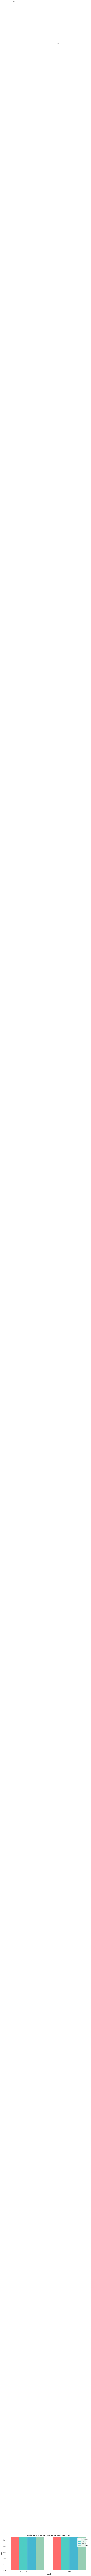

In [16]:
# Visualize comparison
fig, ax = plt.subplots(figsize=(10, 4))

x = np.arange(len(comparison))
width = 0.2

ax.bar(x - 1.5*width, comparison['Accuracy'], width, label='Accuracy', color='#FF6B6B')
ax.bar(x - 0.5*width, comparison['Precision'], width, label='Precision', color='#4ECDC4')
ax.bar(x + 0.5*width, comparison['Recall'], width, label='Recall', color='#45B7D1')
ax.bar(x + 1.5*width, comparison['F1-Score'], width, label='F1-Score', color='#96CEB4')

ax.set_xlabel('Model', fontsize=11)
ax.set_ylabel('Score', fontsize=11)
ax.set_title('Model Performance Comparison (All Metrics)', fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(comparison['Model'])
ax.legend()
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Add value labels on accuracy bars
for i in range(len(comparison)):
    ax.text(i - 1.5*width, comparison.iloc[i]['Accuracy'] + 0.02,
            f"{comparison.iloc[i]['Accuracy']:.3f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


## 8. Detailed Results for Best Model

In [17]:
# Show detailed report
best_predictions = results[best_model]['predictions']

print(f"Classification Report for {best_model}:")
print("="*60)
print(classification_report(y_test, best_predictions,
                          target_names=label_encoder.classes_))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

     Anxiety       0.97      0.89      0.93       148
  Depression       0.71      0.69      0.70       515
      Normal       0.94      0.99      0.96      1269
    Suicidal       0.70      0.65      0.67       510

    accuracy                           0.85      2442
   macro avg       0.83      0.81      0.82      2442
weighted avg       0.84      0.85      0.85      2442



## 9. Confusion Matrix

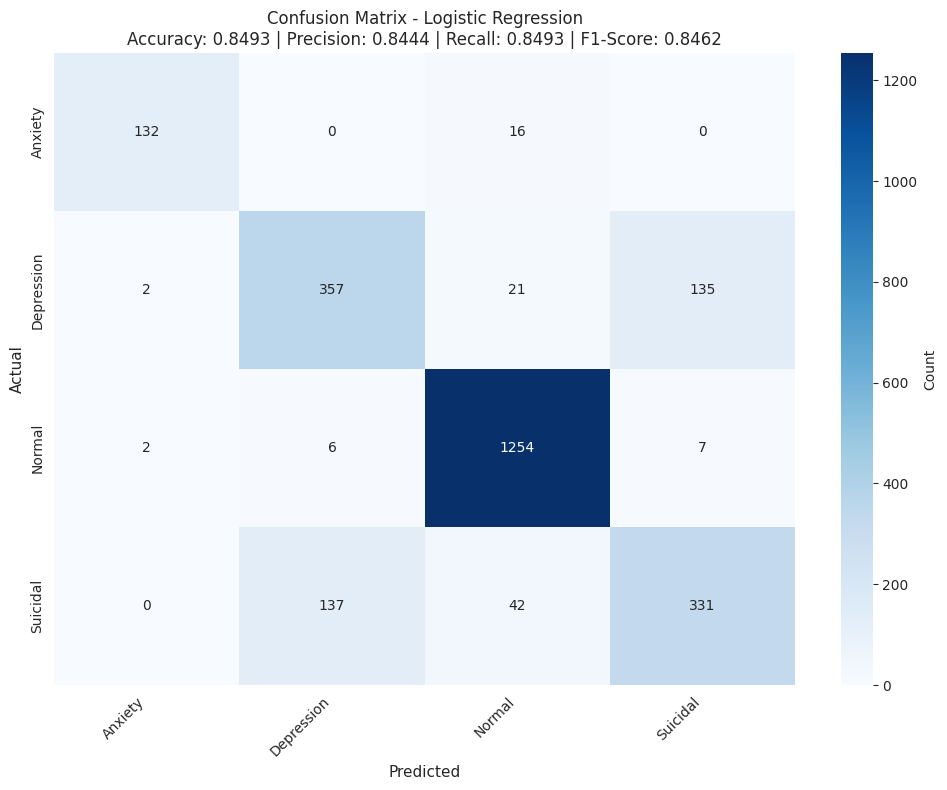

In [18]:
# Create confusion matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})

# Add metrics in title
best_acc = results[best_model]['accuracy']
best_prec = results[best_model]['precision']
best_rec = results[best_model]['recall']
best_f1 = results[best_model]['f1_score']

plt.title(f'Confusion Matrix - {best_model}\n' +
          f'Accuracy: {best_acc:.4f} | Precision: {best_prec:.4f} | Recall: {best_rec:.4f} | F1-Score: {best_f1:.4f}',
          fontsize=12)
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 10. Summary

In [19]:
print("="*70)
print("MENTAL HEALTH DETECTION - SUMMARY")
print("="*70)

print(f"\n📊 Dataset:")
print(f"   Total samples: {len(df):,}")
print(f"   Classes: {len(label_encoder.classes_)}")

print(f"\n🤖 Models Performance:")
for model_name, model_data in results.items():
    print(f"\n   {model_name}:")
    print(f"      Accuracy:  {model_data['accuracy']*100:.2f}%")
    print(f"      Precision: {model_data['precision']*100:.2f}%")
    print(f"      Recall:    {model_data['recall']*100:.2f}%")
    print(f"      F1-Score:  {model_data['f1_score']*100:.2f}%")

print(f"\n🏆 Best Model: {best_model}")
print(f"   Accuracy:  {results[best_model]['accuracy']*100:.2f}%")
print(f"   Precision: {results[best_model]['precision']*100:.2f}%")
print(f"   Recall:    {results[best_model]['recall']*100:.2f}%")
print(f"   F1-Score:  {results[best_model]['f1_score']*100:.2f}%")

print("\n" + "="*70)
print("✅ Project Complete!")
print("="*70)

MENTAL HEALTH DETECTION - SUMMARY

📊 Dataset:
   Total samples: 12,209
   Classes: 4

🤖 Models Performance:

   Logistic Regression:
      Accuracy:  84.93%
      Precision: 84.44%
      Recall:    84.93%
      F1-Score:  84.62%

   SVM:
      Accuracy:  83.54%
      Precision: 83.11%
      Recall:    83.54%
      F1-Score:  83.27%

🏆 Best Model: Logistic Regression
   Accuracy:  84.93%
   Precision: 84.44%
   Recall:    84.93%
   F1-Score:  84.62%

✅ Project Complete!
